# Importing Libraries

In [1]:
import datetime
import warnings
# linear algebra
import numpy as np
# data processing
import pandas as pd
import lightgbm as lgb
from tqdm import tqdm_notebook
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
warnings.filterwarnings('ignore')
# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from scikitplot.metrics import plot_confusion_matrix,plot_precision_recall_curve
from datetime import time
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()
import plotly.graph_objs as go
import eli5
from eli5.sklearn import PermutationImportance

# Load & Explore Dataset

In [2]:
#load data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
#train_df.info()
#test_df.info()

In [3]:
#Explore the train data
train_df.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

In [4]:
#Explore the test data
test_df.head()

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.2675  2.1337  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   
1  18.6316 -4.4131  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773   
2  20.2537  1.5233  ...  -0.7484  10.9935   1.9803   2.1800  12.9813   2.1281   
3  20.5660  3.3755  ...   9.5702   9.0766   1.6580   3.5813  15.1874   3.1656   
4  10.6048  2.9890  ...   4.2259   9.1723   1.2835   3.3778  19.5542  -0.2860   

   var_196  var_197  var_198  var_199  
0   4.3654  10.7200  15.4722  -8.7197  
1  -1.4852   9.8714  19.1293 -20.9760  
2  -7.1086   7.0618  19.8956 -23.1794  
3   3.9567   9.2295  13.0168  -4.2108  
4  -5.1612   7.2882  13.9260  -9.1846  

[5 rows x 201 columns]

In [5]:
train_df.shape , test_df.shape

((200000, 202), (200000, 201))

In [6]:
#count of target in train data
train_df.groupby('target').count()['ID_code']

target
0    179902
1     20098
Name: ID_code, dtype: int64

In [7]:
pd.DataFrame(train_df.dtypes).transpose()

ID_code target    var_0    var_1    var_2    var_3    var_4    var_5  \
0  object  int64  float64  float64  float64  float64  float64  float64   

     var_6    var_7  ...  var_190  var_191  var_192  var_193  var_194  \
0  float64  float64  ...  float64  float64  float64  float64  float64   

   var_195  var_196  var_197  var_198  var_199  
0  float64  float64  float64  float64  float64  

[1 rows x 202 columns]

In [8]:
pd.DataFrame(test_df.dtypes).transpose()

ID_code    var_0    var_1    var_2    var_3    var_4    var_5    var_6  \
0  object  float64  float64  float64  float64  float64  float64  float64   

     var_7    var_8  ...  var_190  var_191  var_192  var_193  var_194  \
0  float64  float64  ...  float64  float64  float64  float64  float64   

   var_195  var_196  var_197  var_198  var_199  
0  float64  float64  float64  float64  float64  

[1 rows x 201 columns]

# Check for Missing data & data type

In [9]:
#Finding the missing values in train and test data
train_missing=train_df.isnull().sum().sum()
test_missing=test_df.isnull().sum().sum()
print('Missing values in train data :',train_missing)
print('Missing values in test data :',test_missing)

Missing values in train data : 0
Missing values in test data : 0


# Describe Data

In [10]:
# describe train
train_df.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

In [11]:
# describe test
test_df.describe()

var_0          var_1          var_2          var_3  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       10.658737      -1.624244      10.707452       6.788214   
std         3.036716       4.040509       2.633888       2.052724   
min         0.188700     -15.043400       2.355200      -0.022400   
25%         8.442975      -4.700125       8.735600       5.230500   
50%        10.513800      -1.590500      10.560700       6.822350   
75%        12.739600       1.343400      12.495025       8.327600   
max        22.323400       9.385100      18.714100      13.142000   

               var_4          var_5          var_6          var_7  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       11.076399      -5.050558       5.415164      16.529143   
std         1.616456       7.869293       0.864686       3.424482   
min         5.484400     -27.767000       2.216400       5.713700   
25%         9.891075     -11.201400       4.772600      13.933900   
50%        11.099750      -4.834100       5.391600      16.422700   
75%        12.253400       0.942575       6.005800      19.094550   
max        16.037100      17.253700       8.302500      28.292800   

               var_8          var_9  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean        0.277135       7.569407  ...       3.189766       7.458269   
std         3.333375       1.231865  ...       4.551239       3.025189   
min        -9.956000       4.243300  ...     -14.093300      -2.407000   
25%        -2.303900       6.623800  ...      -0.095000       5.166500   
50%         0.372000       7.632000  ...       3.162400       7.379000   
75%         2.930025       8.584825  ...       6.336475       9.531100   
max         9.665500      11.003600  ...      20.359000      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.925944       3.322016      17.996967      -0.133657   
std         1.479966       3.995599       3.140652       1.429678   
min        -3.340900     -11.413100       9.382800      -4.911900   
25%         0.882975       0.587600      15.634775      -1.160700   
50%         1.892600       3.428500      17.977600      -0.162000   
75%         2.956000       6.174200      20.391725       0.837900   
max         8.005000      17.632600      27.947800       4.545400   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.290899       8.912428      15.869184      -3.246342  
std         5.446346       0.920904       3.008717      10.398589  
min       -13.944200       6.169600       6.584000     -39.457800  
25%        -1.948600       8.260075      13.847275     -11.124000  
50%         2.403600       8.892800      15.943400      -2.725950  
75%         6.519800       9.595900      18.045200       4.935400  
max        15.920700      12.275800      26.538400      27.907400  

[8 rows x 200 columns]

# Distribution of target value

There are 10.049% target values with 1
There are 89.951% target values with 0


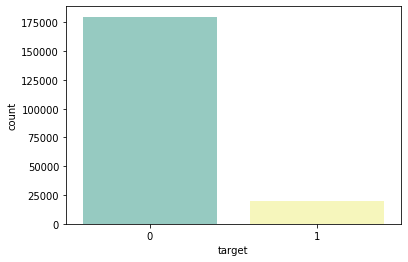

In [12]:
#The distribution of target value in train dataset
sns.countplot(train_df['target'], palette='Set3')

#The data is unbalanced with respect with target value
print("There are {}% target values with 1".format(100 * train_df["target"].value_counts()[1]/train_df.shape[0])),
print("There are {}% target values with 0".format(100 * train_df["target"].value_counts()[0]/train_df.shape[0]))

# scaling dataset

In [13]:
data= train_df 
y = data['target']
X = data.drop(['target', 'ID_code'], axis=1)

#scaling dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

var_0     var_1     var_2     var_3     var_4     var_5     var_6  \
0 -0.577102 -1.273737  0.451707 -0.833709  0.235571 -0.536430 -0.334926   
1  0.269959 -0.622138  1.190360 -0.688846  0.790975  1.539900  0.244461   
2 -0.681113 -0.276066  0.516988  0.536516 -0.305477 -0.511033  1.769839   
3  0.125158 -0.129426 -0.667575  0.195355  0.927992  0.410672  0.500633   
4 -0.277303  0.035610  0.817683 -0.077829  0.738607  0.955574  0.613372   

      var_7     var_8     var_9  ...   var_190   var_191   var_192   var_193  \
0  0.608751 -1.561580 -1.473796  ...  0.263374 -1.149158  0.817469 -0.411013   
1 -0.003525  0.858974  0.419300  ...  0.966611  0.093605  0.443623  1.908764   
2 -0.564749 -1.561370 -1.307408  ... -0.072093  0.777997 -0.174131 -0.412316   
3 -0.474201 -1.843910  0.548767  ...  0.270216 -0.891456 -0.818468 -0.478548   
4  0.791544  1.794753  0.090006  ... -1.036191  0.688988 -1.405987  1.468536   

    var_194   var_195   var_196   var_197   var_198   var_199  
0  0.168705 -1.578117  1.022131 -0.373968 -1.026398  0.214135  
1 -0.817594  1.522342  1.067654 -0.129400  0.825417  0.505685  
2  1.151591  2.297370 -1.617906 -0.695141 -0.381449  0.356681  
3  1.607869 -0.789517 -0.959020  1.501744  0.697118 -0.543502  
4 -1.501101 -0.958473  0.297627  0.645537  0.706318 -0.525375  

[5 rows x 200 columns]

In [14]:
#splitting dataset into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101, stratify=y)
X_train.head()

var_0     var_1     var_2     var_3     var_4     var_5     var_6  \
86698   0.460351  0.019758  2.429754 -0.794704  0.223126 -0.295715 -0.623870   
176411 -1.070253 -1.564278 -0.582945 -0.600607  0.227994 -0.542484 -1.249645   
12536  -1.047424  1.282562 -0.517096 -0.092168  1.168451 -1.013650 -0.569866   
115696  1.645663  1.593671  1.416572  1.002964 -1.728639 -0.166825 -0.602753   
134161 -0.918117  0.773233  0.144008 -1.882936 -0.274672  0.985282 -0.382468   

           var_7     var_8     var_9  ...   var_190   var_191   var_192  \
86698  -0.457408  1.475485  1.005179  ... -1.182378  0.360832 -0.598503   
176411 -1.099349 -0.068583 -0.109335  ...  0.278549  0.345286  0.664332   
12536  -1.039520  0.604130 -0.587852  ...  0.224886 -0.734738  0.509505   
115696 -0.129444  0.541086 -0.946942  ... -2.106739 -1.307331  1.335996   
134161 -1.518885  1.449769  1.216180  ...  0.209601  0.327756 -0.425075   

         var_193   var_194   var_195   var_196   var_197   var_198   var_199  
86698   1.288953 -1.895021 -0.040725 -0.470548 -0.789756  0.105841  0.199410  
176411  0.666236 -0.330090 -1.174862 -1.303368  1.661788  0.596950  1.095349  
12536   0.810423  1.216054  0.248073 -0.492585 -1.455430 -0.210805 -0.572137  
115696  0.773224  1.105501 -0.815893  0.854833  0.954449  1.283215  0.056049  
134161  0.346322  0.049157  1.531087  0.560280 -0.476830  1.087561 -0.657278  

[5 rows x 200 columns]

In [15]:
X_train.shape, X_test.shape

((140000, 200), (60000, 200))

In [16]:
#The scatter plot for train and test set for few of the features
def plot_feature_scatter(df1, df2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(4,4,figsize=(14,14))

    for feature in features:
        i += 1
        plt.subplot(4,4,i)
        plt.scatter(df1[feature], df2[feature], marker='+')
        plt.xlabel(feature, fontsize=9)
    plt.show();

<Figure size 432x288 with 0 Axes>

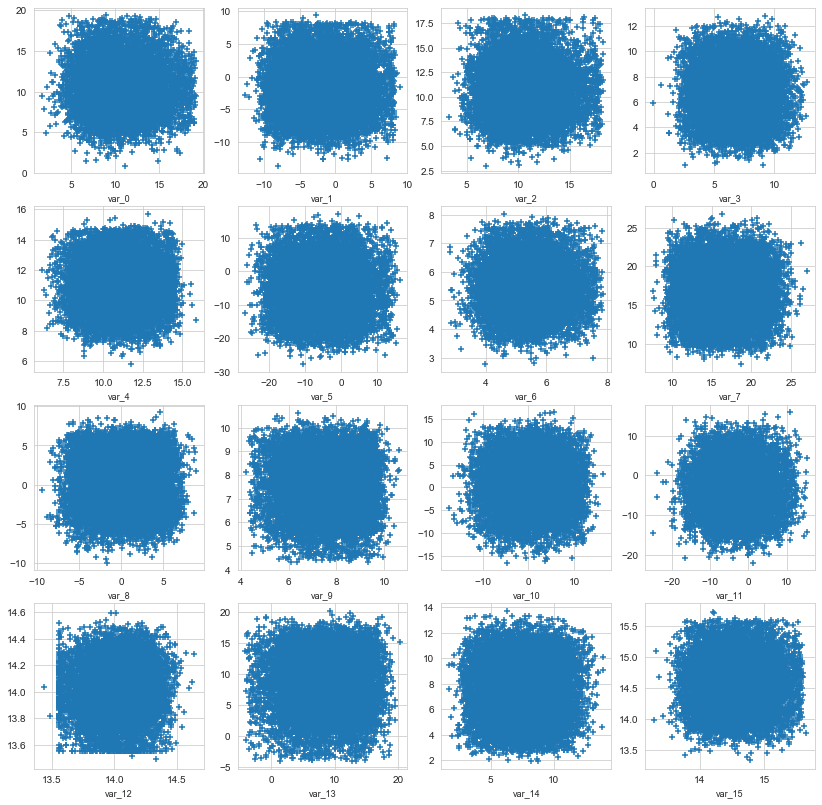

In [17]:
features = ['var_0', 'var_1','var_2','var_3', 'var_4', 'var_5', 'var_6', 'var_7', 
           'var_8', 'var_9', 'var_10','var_11','var_12', 'var_13', 'var_14', 'var_15', 
           ]
plot_feature_scatter(train_df[::20],test_df[::20], features)

In [18]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();

<Figure size 432x288 with 0 Axes>

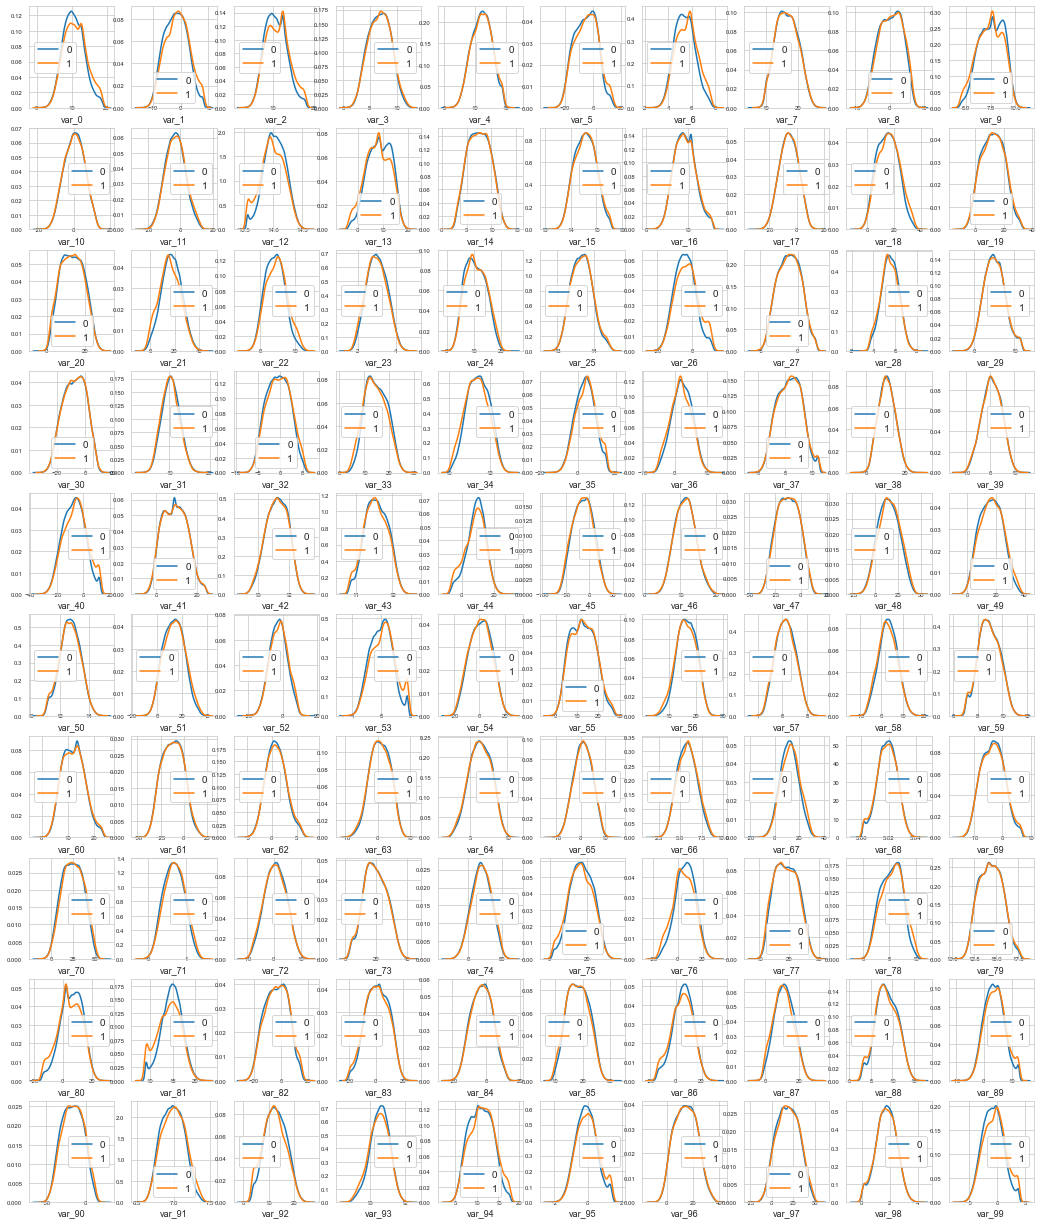

In [19]:
t0 = train_df.loc[train_df['target'] == 0]
t1 = train_df.loc[train_df['target'] == 1]
features = train_df.columns.values[2:102]
plot_feature_distribution(t0, t1, '0', '1', features)

<Figure size 432x288 with 0 Axes>

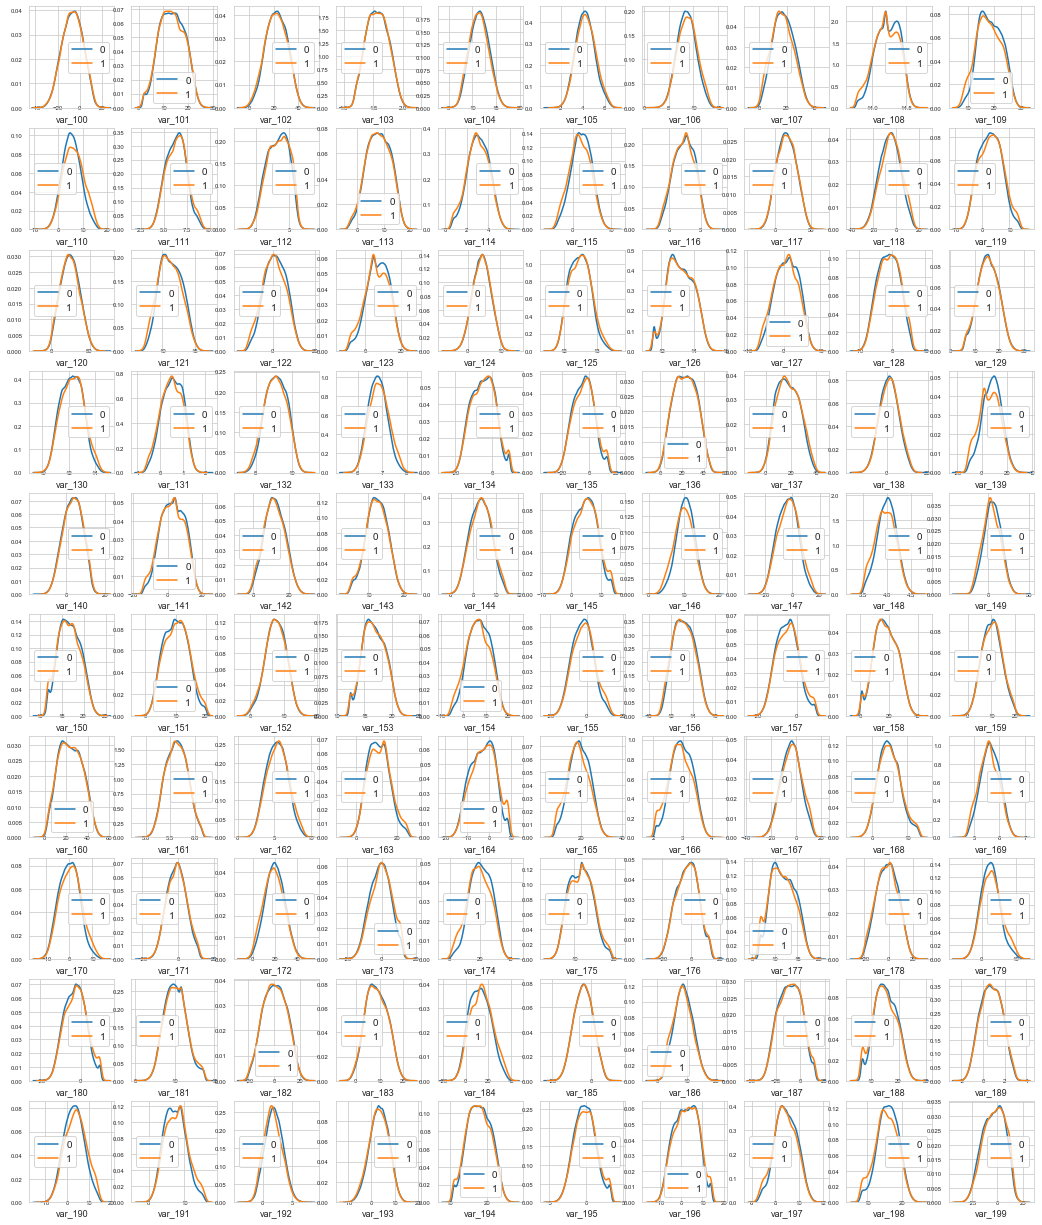

In [20]:
features = train_df.columns.values[102:202]
plot_feature_distribution(t0, t1, '0', '1', features)

<Figure size 432x288 with 0 Axes>

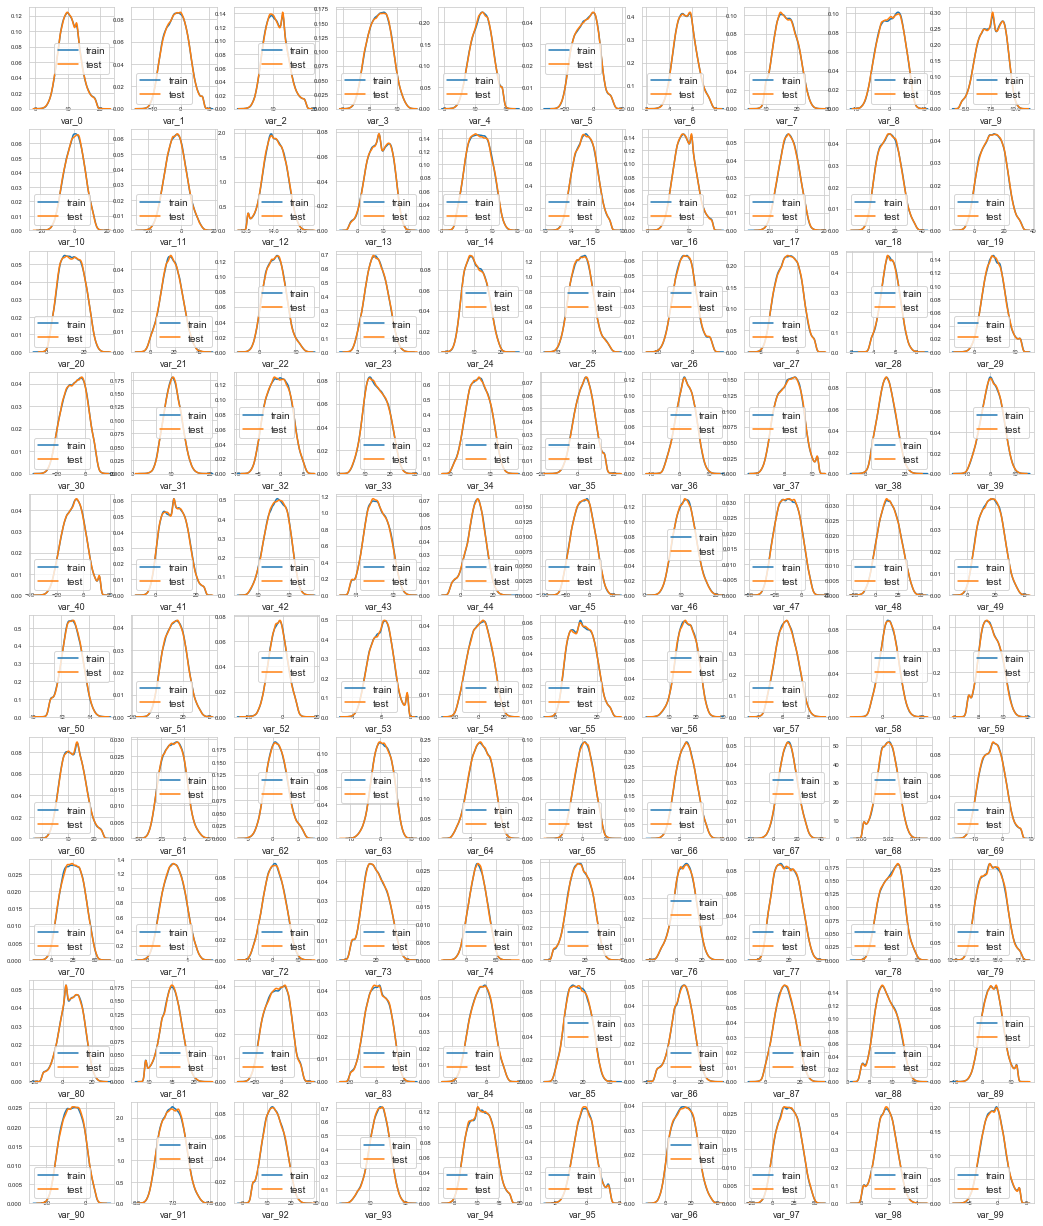

In [21]:
features = train_df.columns.values[2:102]
plot_feature_distribution(train_df, test_df, 'train', 'test', features)

<Figure size 432x288 with 0 Axes>

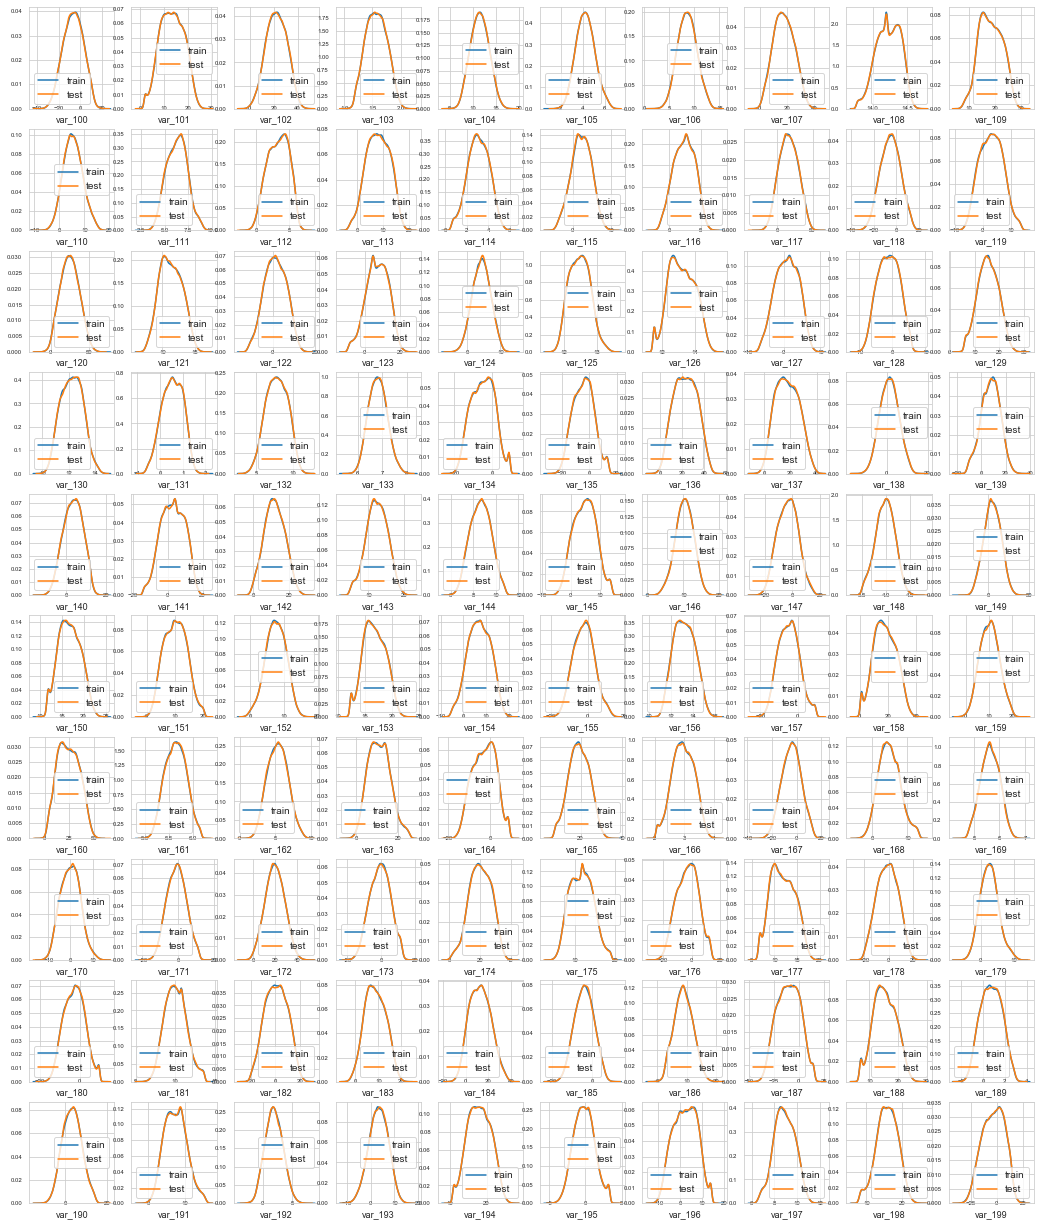

In [22]:
features = train_df.columns.values[102:202]
plot_feature_distribution(train_df, test_df, 'train', 'test', features)

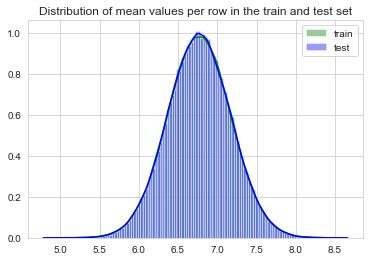

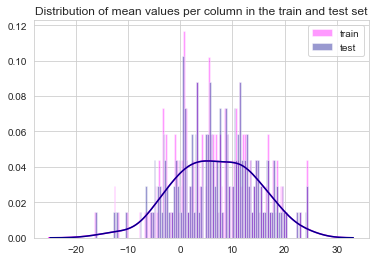

In [23]:
#The distribution of the mean values per row in the train & test set
#plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(train_df[features].mean(axis=1),color="green", kde=True,bins=120, label='train')
sns.distplot(test_df[features].mean(axis=1),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

#The distribution of the mean values per column in the train & test set
#plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train and test set")
sns.distplot(train_df[features].mean(axis=0),color="magenta",kde=True,bins=120, label='train')
sns.distplot(test_df[features].mean(axis=0),color="darkblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()



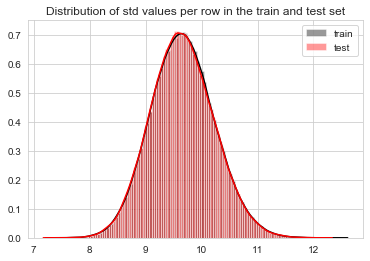

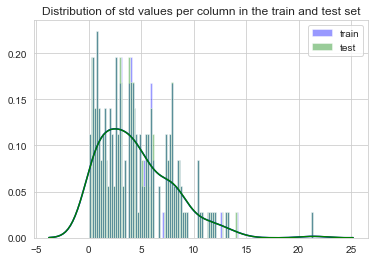

In [24]:
# The distribution of std values per row in the train and test set
#plt.figure(figsize=(16,6))
plt.title("Distribution of std values per row in the train and test set")
sns.distplot(train_df[features].std(axis=1),color="black", kde=True,bins=120, label='train')
sns.distplot(test_df[features].std(axis=1),color="red", kde=True,bins=120, label='test')
plt.legend();plt.show()

# The distribution of std values per column in the train and test set
#plt.figure(figsize=(16,6))
plt.title("Distribution of std values per column in the train and test set")
sns.distplot(train_df[features].std(axis=0),color="blue",kde=True,bins=120, label='train')
sns.distplot(test_df[features].std(axis=0),color="green", kde=True,bins=120, label='test')
plt.legend(); plt.show()

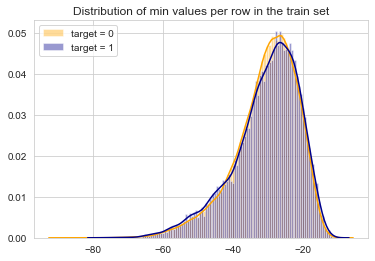

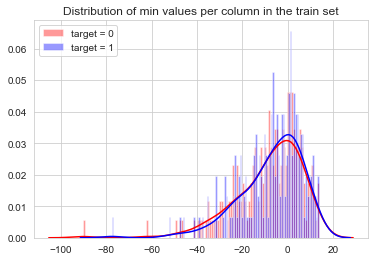

In [25]:
# The distribution of min values per row in the train and test set
t0 = train_df.loc[train_df['target'] == 0]
t1 = train_df.loc[train_df['target'] == 1]
#plt.figure(figsize=(16,6))
plt.title("Distribution of min values per row in the train set")
sns.distplot(t0[features].min(axis=1),color="orange", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].min(axis=1),color="darkblue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

# The distribution of min values per column in the train and test set
#plt.figure(figsize=(16,6))
plt.title("Distribution of min values per column in the train set")
sns.distplot(t0[features].min(axis=0),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].min(axis=0),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

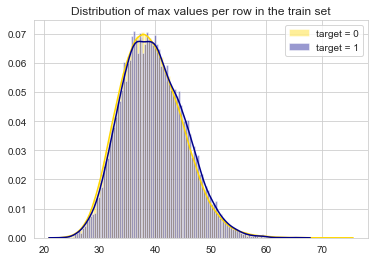

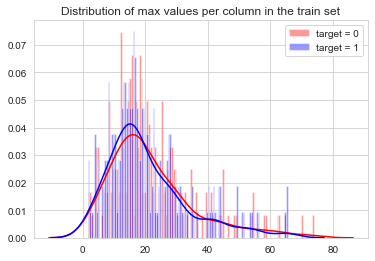

In [26]:
# The distribution of max values per row in the train and test set
#plt.figure(figsize=(16,6))
plt.title("Distribution of max values per row in the train set")
sns.distplot(t0[features].max(axis=1),color="gold", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].max(axis=1),color="darkblue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

# The distribution of max values per column in the train and test set
#plt.figure(figsize=(16,6))
plt.title("Distribution of max values per column in the train set")
sns.distplot(t0[features].max(axis=0),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].max(axis=0),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

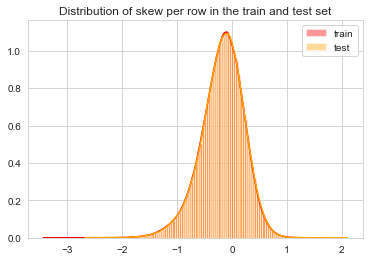

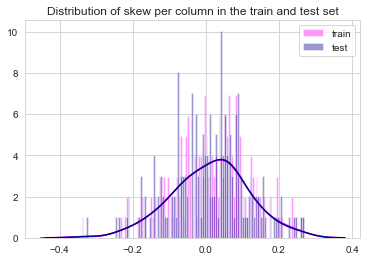

In [27]:
#Distribution of skew per row in the train and test set
#plt.figure(figsize=(16,6))
plt.title("Distribution of skew per row in the train and test set")
sns.distplot(train_df[features].skew(axis=1),color="red", kde=True,bins=120, label='train')
sns.distplot(test_df[features].skew(axis=1),color="orange", kde=True,bins=120, label='test')
plt.legend()
plt.show()

#Distribution of skew per column in the train and test set
#plt.figure(figsize=(16,6))
plt.title("Distribution of skew per column in the train and test set")
sns.distplot(train_df[features].skew(axis=0),color="magenta", kde=True,bins=120, label='train')
sns.distplot(test_df[features].skew(axis=0),color="darkblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

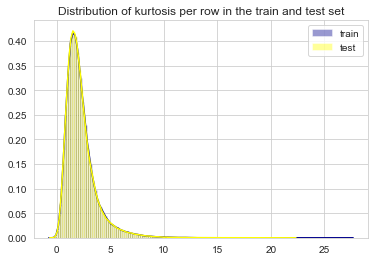

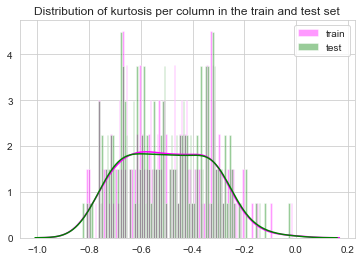

In [28]:
#Distribution of kurtosis per row in the train and test 
#plt.figure(figsize=(16,6))
plt.title("Distribution of kurtosis per row in the train and test set")
sns.distplot(train_df[features].kurtosis(axis=1),color="darkblue", kde=True,bins=120, label='train')
sns.distplot(test_df[features].kurtosis(axis=1),color="yellow", kde=True,bins=120, label='test')
plt.legend()
plt.show()

#Distribution of kurtosis per column in the train and test 
#plt.figure(figsize=(16,6))
plt.title("Distribution of kurtosis per column in the train and test set")
sns.distplot(train_df[features].kurtosis(axis=0),color="magenta", kde=True,bins=120, label='train')
sns.distplot(test_df[features].kurtosis(axis=0),color="green", kde=True,bins=120, label='test')
plt.legend()
plt.show()


# Correlation between the attributes

In [29]:
#Correlation between the attributes for train data
#Correlations in train attributes
train_attributes=train_df.columns.values[2:202]
train_correlations=train_df[train_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
train_correlations=train_correlations[train_correlations['level_0']!=train_correlations['level_1']]
train_correlations.head(10)

#print(train_correlations.head(10))
#print(train_correlations.tail(10))

level_0  level_1             0
0   var_75  var_191  2.703975e-08
1  var_191   var_75  2.703975e-08
2  var_173    var_6  5.942735e-08
3    var_6  var_173  5.942735e-08
4  var_126  var_109  1.313947e-07
5  var_109  var_126  1.313947e-07
6  var_144   var_27  1.772502e-07
7   var_27  var_144  1.772502e-07
8  var_177  var_100  3.116544e-07
9  var_100  var_177  3.116544e-07

In [30]:
train_correlations.tail(10)

level_0  level_1         0
39790  var_183  var_189  0.009359
39791  var_189  var_183  0.009359
39792  var_174   var_81  0.009490
39793   var_81  var_174  0.009490
39794   var_81  var_165  0.009714
39795  var_165   var_81  0.009714
39796   var_53  var_148  0.009788
39797  var_148   var_53  0.009788
39798   var_26  var_139  0.009844
39799  var_139   var_26  0.009844

In [31]:
#Correlation between the attributes for test data
#Correlations in test attributes
test_attributes=test_df.columns.values[1:201]
test_correlations=test_df[test_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
test_correlations=test_correlations[test_correlations['level_0']!=test_correlations['level_1']]
test_correlations.head(10)

#print(test_correlations.head(10))
#print(test_correlations.tail(10))

level_0  level_1             0
0  var_154  var_175  1.477268e-07
1  var_175  var_154  1.477268e-07
2  var_188  var_113  1.639749e-07
3  var_113  var_188  1.639749e-07
4  var_131    var_8  4.695407e-07
5    var_8  var_131  4.695407e-07
6   var_60  var_189  9.523709e-07
7  var_189   var_60  9.523709e-07
8  var_159   var_96  1.147835e-06
9   var_96  var_159  1.147835e-06

In [32]:
test_correlations.tail(10)

level_0  level_1         0
39790  var_122  var_164  0.008513
39791  var_164  var_122  0.008513
39792  var_164    var_2  0.008614
39793    var_2  var_164  0.008614
39794   var_31  var_132  0.008714
39795  var_132   var_31  0.008714
39796   var_96  var_143  0.008829
39797  var_143   var_96  0.008829
39798  var_139   var_75  0.009868
39799   var_75  var_139  0.009868

# Correlation plot for train and test data

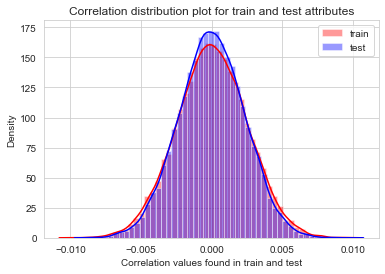

In [33]:
#Correlation plot for train and test data
# correlation between the train and test attributes is very very small
#it means that features are independent each other.
#Correlations in train data
train_correlations=train_df[train_attributes].corr()
train_correlations=train_correlations.values.flatten()
train_correlations=train_correlations[train_correlations!=1]
#Correlations in test data
test_correlations=test_df[test_attributes].corr()
test_correlations=test_correlations.values.flatten()
test_correlations=test_correlations[test_correlations!=1]

#plt.figure(figsize=(20,5))
#Distribution plot for correlations in train data
sns.distplot(train_correlations, color="Red", label="train")
#Distribution plot for correlations in test data
sns.distplot(test_correlations, color="Blue", label="test")
plt.xlabel("Correlation values found in train and test")
plt.ylabel("Density")
plt.title("Correlation distribution plot for train and test attributes")
plt.legend()

# Feature Engineering

In [34]:
#Feature engineering
#Permutation variable importance measure in a random forest for classification
X=train_df.drop(columns=['ID_code','target'],axis=1)
test=test_df.drop(columns=['ID_code'],axis=1)
Y=train_df['target']

In [35]:
#build simple model to find features which are more important
#Split the training data
x_train,x_test,y_train, y_test = train_test_split(X, Y, random_state=42)

print('Shape of X_train :',x_train.shape)
print('Shape of X_test :',x_test.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train : (150000, 200)
Shape of X_test : (50000, 200)
Shape of y_train : (150000,)
Shape of y_test: (50000,)


In [36]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=10,random_state=42)
#fitting the model
rf_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [37]:
#calculate weights and show important features using eli5 library
#Permutation importance
import eli5
from eli5.sklearn import PermutationImportance
perm_imp=PermutationImportance(rf_model,random_state=42)
#fitting the model
perm_imp.fit(x_test,y_test)

PermutationImportance(cv='prefit',
           estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
           n_iter=5, random_state=42, refit=True, scoring=None)

# Important Features

In [38]:
#Important features
eli5.show_weights(perm_imp,feature_names=x_test.columns.tolist(),top=200)

In [39]:
#Feature Engineering#
"""y = train_df.target
train_df= train_df.iloc[:, 2:] """

'y = train_df.target\ntrain_df= train_df.iloc[:, 2:] '

In [40]:
"""rf = RandomForestClassifier( max_depth=10, verbose=3, n_estimators=20)
parameters = {'n_estimators': [120, 100], 'max_depth':[3,5,]}
grid = GridSearchCV(rf, parameters, cv=3, n_jobs=-1, verbose=3, scoring=make_scorer(roc_auc_score))"""

"rf = RandomForestClassifier( max_depth=10, verbose=3, n_estimators=20)\nparameters = {'n_estimators': [120, 100], 'max_depth':[3,5,]}\ngrid = GridSearchCV(rf, parameters, cv=3, n_jobs=-1, verbose=3, scoring=make_scorer(roc_auc_score))"

In [41]:
"""df_train_FS=train_df
grid.fit(df_train_FS.drop(["target",'ID_code'], axis=1).values, df_train_FS.target.values)"""

'df_train_FS=train_df\ngrid.fit(df_train_FS.drop(["target",\'ID_code\'], axis=1).values, df_train_FS.target.values)'

In [42]:
"grid.best_score_"""

'grid.best_score_'

In [43]:
"""n_top=10
importance_feature_df=grid.best_estimator_.feature_importances_
idx=np.argsort(importance_feature_df)[::-1][0:n_top]
features_name=df_train_FS.drop(["target",'ID_code'], axis=1).columns.values

#plt.figure(figsize=(20,5))
sns.barplot(x=features_name[idx], y=importance_feature_df[idx],n_boot=10)
# plt.tab"""


'n_top=10\nimportance_feature_df=grid.best_estimator_.feature_importances_\nidx=np.argsort(importance_feature_df)[::-1][0:n_top]\nfeatures_name=df_train_FS.drop(["target",\'ID_code\'], axis=1).columns.values\n\n#plt.figure(figsize=(20,5))\nsns.barplot(x=features_name[idx], y=importance_feature_df[idx],n_boot=10)\n# plt.tab'

# Feature Selection

In [44]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
rf = RandomForestClassifier( max_depth=10, verbose=3, n_estimators=20)
parameters = {'n_estimators': [120, 100], 'max_depth':[3,5,]}
grid = GridSearchCV(rf, parameters, cv=3, n_jobs=-1, verbose=3, scoring=make_scorer(roc_auc_score))

In [45]:
feat_labels=['var_0' ,'var_1' ,'var_2' ,'var_3' ,'var_4' ,'var_5' ,'var_6' ,'var_7' ,'var_8' ,'var_9' ,'var_10' ,'var_11' ,'var_12' ,'var_13' ,'var_14' ,'var_15' ,'var_16' ,'var_17' ,'var_18' ,'var_19' ,'var_20' ,'var_21' ,'var_22' ,'var_23' ,'var_24' ,'var_25' ,'var_26' ,'var_27' ,'var_28' ,'var_29' ,'var_30' ,'var_31' ,'var_32' ,'var_33' ,'var_34' ,'var_35' ,'var_36' ,'var_37' ,'var_38' ,'var_39' ,'var_40' ,'var_41' ,'var_42' ,'var_43' ,'var_44' ,'var_45' ,'var_46' ,'var_47' ,'var_48' ,'var_49' ,'var_50' ,'var_51' ,'var_52' ,'var_53' ,'var_54' ,'var_55' ,'var_56' ,'var_57' ,'var_58' ,'var_59' ,'var_60' ,'var_61' ,'var_62' ,'var_63' ,'var_64' ,'var_65' ,'var_66' ,'var_67' ,'var_68' ,'var_69' ,'var_70' ,'var_71' ,'var_72' ,'var_73' ,'var_74' ,'var_75' ,'var_76' ,'var_77' ,'var_78' ,'var_79' ,'var_80' ,'var_81' ,'var_82' ,'var_83' ,'var_84' ,'var_85' ,'var_86' ,'var_87' ,'var_88' ,'var_89' ,'var_90' ,'var_91' ,'var_92' ,'var_93' ,'var_94' ,'var_95' ,'var_96' ,'var_97' ,'var_98' ,'var_99' ,'var_100' ,'var_101' ,'var_102' ,'var_103' ,'var_104' ,'var_105' ,'var_106' ,'var_107' ,'var_108' ,'var_109' ,'var_110' ,'var_111' ,'var_112' ,'var_113' ,'var_114' ,'var_115' ,'var_116' ,'var_117' ,'var_118' ,'var_119' ,'var_120' ,'var_121' ,'var_122' ,'var_123' ,'var_124' ,'var_125' ,'var_126' ,'var_127' ,'var_128' ,'var_129' ,'var_130' ,'var_131' ,'var_132' ,'var_133' ,'var_134' ,'var_135' ,'var_136' ,'var_137' ,'var_138' ,'var_139' ,'var_140' ,'var_141' ,'var_142' ,'var_143' ,'var_144' ,'var_145' ,'var_146' ,'var_147' ,'var_148' ,'var_149' ,'var_150' ,'var_151' ,'var_152' ,'var_153' ,'var_154' ,'var_155' ,'var_156' ,'var_157' ,'var_158' ,'var_159' ,'var_160' ,'var_161' ,'var_162' ,'var_163' ,'var_164' ,'var_165' ,'var_166' ,'var_167' ,'var_168' ,'var_169' ,'var_170' ,'var_171' ,'var_172' ,'var_173' ,'var_174' ,'var_175' ,'var_176' ,'var_177' ,'var_178' ,'var_179' ,'var_180' ,'var_181' ,'var_182' ,'var_183' ,'var_184' ,'var_185' ,'var_186' ,'var_187' ,'var_188' ,'var_189' ,'var_190' ,'var_191' ,'var_192' ,'var_193' ,'var_194' ,'var_195' ,'var_196' ,'var_197' ,'var_198' ,'var_199']

In [46]:
x_train,x_test,y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Ranking Features
rnd_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rnd_clf.fit(x_train, y_train)
importances = pd.DataFrame({'feature': x_train.columns, 'importance': np.round(rnd_clf.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
print("Rank Features :")
#print(importances)
importances.head(20)

Rank Features :


importance
feature            
var_81        0.013
var_12        0.010
var_139       0.009
var_53        0.008
var_22        0.008
var_110       0.008
var_174       0.008
var_146       0.008
var_26        0.008
var_166       0.008
var_6         0.008
var_80        0.008
var_165       0.007
var_148       0.007
var_99        0.007
var_76        0.007
var_109       0.007
var_78        0.007
var_0         0.007
var_179       0.007

In [47]:
#plot features importances
#importances.plot.bar()

In [48]:
for features in zip(feat_labels, rnd_clf.feature_importances_):
    print (features)
    

('var_0', 0.006718432014536784)
('var_1', 0.006289727107776279)
('var_2', 0.0067374594038351636)
('var_3', 0.004457146794811957)
('var_4', 0.004192692699196021)
('var_5', 0.005074876616171361)
('var_6', 0.00772990390261229)
('var_7', 0.0036614607542839184)
('var_8', 0.003933328142693325)
('var_9', 0.005819717286155963)
('var_10', 0.0037109425470228025)
('var_11', 0.004439063787138476)
('var_12', 0.010145438115959549)
('var_13', 0.007256273063785217)
('var_14', 0.003820511660435322)
('var_15', 0.004251627116181665)
('var_16', 0.004091192818630115)
('var_17', 0.0037379878063277285)
('var_18', 0.0059272282362826416)
('var_19', 0.004124209450998911)
('var_20', 0.004089213859168131)
('var_21', 0.0064763212878530645)
('var_22', 0.007561458839679656)
('var_23', 0.004440853232019018)
('var_24', 0.004510205081130233)
('var_25', 0.004048803838655478)
('var_26', 0.008262371234635909)
('var_27', 0.00396840420001141)
('var_28', 0.004521577929771687)
('var_29', 0.003912907669782131)
('var_30', 0.004

In [49]:
#features>0.005
for features in zip(feat_labels, rnd_clf.feature_importances_):
    if features[1]>=0.005:
        print(features[0], "", end='') #71

var_0 var_1 var_2 var_5 var_6 var_9 var_12 var_13 var_18 var_21 var_22 var_26 var_33 var_34 var_36 var_40 var_44 var_53 var_56 var_67 var_75 var_76 var_78 var_80 var_81 var_86 var_89 var_91 var_92 var_94 var_95 var_99 var_107 var_108 var_109 var_110 var_115 var_119 var_121 var_122 var_123 var_125 var_127 var_130 var_133 var_139 var_141 var_146 var_147 var_148 var_154 var_155 var_162 var_163 var_164 var_165 var_166 var_169 var_170 var_173 var_174 var_177 var_179 var_180 var_184 var_188 var_190 var_191 var_197 var_198 

In [50]:
#features<0.005
for features in zip(feat_labels, rnd_clf.feature_importances_):
    if features[1]<0.005:
        print(features[0], "", end='') #129

var_3 var_4 var_7 var_8 var_10 var_11 var_14 var_15 var_16 var_17 var_19 var_20 var_23 var_24 var_25 var_27 var_28 var_29 var_30 var_31 var_32 var_35 var_37 var_38 var_39 var_41 var_42 var_43 var_45 var_46 var_47 var_48 var_49 var_50 var_51 var_52 var_54 var_55 var_57 var_58 var_59 var_60 var_61 var_62 var_63 var_64 var_65 var_66 var_68 var_69 var_70 var_71 var_72 var_73 var_74 var_77 var_79 var_82 var_83 var_84 var_85 var_87 var_88 var_90 var_93 var_96 var_97 var_98 var_100 var_101 var_102 var_103 var_104 var_105 var_106 var_111 var_112 var_113 var_114 var_116 var_117 var_118 var_120 var_124 var_126 var_128 var_129 var_131 var_132 var_134 var_135 var_136 var_137 var_138 var_140 var_142 var_143 var_144 var_145 var_149 var_150 var_151 var_152 var_153 var_156 var_157 var_158 var_159 var_160 var_161 var_167 var_168 var_171 var_172 var_175 var_176 var_178 var_181 var_182 var_183 var_185 var_186 var_187 var_189 var_192 var_193 var_194 var_195 var_196 var_199 

In [51]:
#drop= ['var_3' , 'var_4' , 'var_7' , 'var_8' , 'var_10' , 'var_11' , 'var_14' , 'var_15' , 'var_16' , 'var_17' , 'var_19' , 'var_20' , 'var_23' , 'var_24' , 'var_25' , 'var_27' , 'var_28' , 'var_29' , 'var_30' , 'var_31' , 'var_32' , 'var_35' , 'var_36' , 'var_37' , 'var_38' , 'var_39' , 'var_41' , 'var_42' , 'var_43' , 'var_45' , 'var_46' , 'var_47' , 'var_48' , 'var_49' , 'var_50' , 'var_51' , 'var_52' , 'var_54' , 'var_55' , 'var_57' , 'var_58' , 'var_59' , 'var_60' , 'var_61' , 'var_62' , 'var_63' , 'var_64' , 'var_65' , 'var_66' , 'var_68' , 'var_69' , 'var_70' , 'var_71' , 'var_72' , 'var_73' , 'var_74' , 'var_77' , 'var_79' , 'var_82' , 'var_83' , 'var_84' , 'var_85' , 'var_87' , 'var_88' , 'var_90' , 'var_93' , 'var_96' , 'var_97' , 'var_98' , 'var_100' , 'var_101' , 'var_102' , 'var_103' , 'var_104' , 'var_105' , 'var_111' , 'var_112' , 'var_113' , 'var_114' , 'var_116' , 'var_117' , 'var_118' , 'var_120' , 'var_124' , 'var_125' , 'var_126' , 'var_128' , 'var_129' , 'var_132' , 'var_134' , 'var_136' , 'var_137' , 'var_138' , 'var_140' , 'var_142' , 'var_143' , 'var_144' , 'var_150' , 'var_151' , 'var_152' , 'var_153' , 'var_156' , 'var_158' , 'var_159' , 'var_160' , 'var_161' , 'var_162' , 'var_163' , 'var_167' , 'var_168' , 'var_171' , 'var_172' , 'var_175' , 'var_176' , 'var_178' , 'var_181' , 'var_182' , 'var_183' , 'var_185' , 'var_186' , 'var_187' , 'var_189' , 'var_192' , 'var_193' , 'var_194' , 'var_195' , 'var_196' , 'var_197' , 'var_199']

In [52]:
# Drop Features 
#features_drop= ['var_3' , 'var_4' , 'var_7' , 'var_8' , 'var_10' , 'var_11' , 'var_14' , 'var_15' , 'var_16' , 'var_17' , 'var_19' , 'var_20' , 'var_23' , 'var_24' , 'var_25' , 'var_27' , 'var_28' , 'var_29' , 'var_30' , 'var_31' , 'var_32' , 'var_35' , 'var_36' , 'var_37' , 'var_38' , 'var_39' , 'var_41' , 'var_42' , 'var_43' , 'var_45' , 'var_46' , 'var_47' , 'var_48' , 'var_49' , 'var_50' , 'var_51' , 'var_52' , 'var_54' , 'var_55' , 'var_57' , 'var_58' , 'var_59' , 'var_60' , 'var_61' , 'var_62' , 'var_63' , 'var_64' , 'var_65' , 'var_66' , 'var_68' , 'var_69' , 'var_70' , 'var_71' , 'var_72' , 'var_73' , 'var_74' , 'var_77' , 'var_79' , 'var_82' , 'var_83' , 'var_84' , 'var_85' , 'var_87' , 'var_88' , 'var_90' , 'var_93' , 'var_96' , 'var_97' , 'var_98' , 'var_100' , 'var_101' , 'var_102' , 'var_103' , 'var_104' , 'var_105' , 'var_111' , 'var_112' , 'var_113' , 'var_114' , 'var_116' , 'var_117' , 'var_118' , 'var_120' , 'var_124' , 'var_125' , 'var_126' , 'var_128' , 'var_129' , 'var_132' , 'var_134' , 'var_136' , 'var_137' , 'var_138' , 'var_140' , 'var_142' , 'var_143' , 'var_144' , 'var_150' , 'var_151' , 'var_152' , 'var_153' , 'var_156' , 'var_158' , 'var_159' , 'var_160' , 'var_161' , 'var_162' , 'var_163' , 'var_167' , 'var_168' , 'var_171' , 'var_172' , 'var_175' , 'var_176' , 'var_178' , 'var_181' , 'var_182' , 'var_183' , 'var_185' , 'var_186' , 'var_187' , 'var_189' , 'var_192' , 'var_193' , 'var_194' , 'var_195' , 'var_196' , 'var_197' , 'var_199']
#train = train.drop(features_drop, axis=1)
#test = test.drop(features_drop, axis=1)
#train = train.drop(['ID_code'], axis=1)

In [53]:
#Split the train data using StratefiedKFold cross validator
#Training data
X=train_df.drop(['ID_code','target'],axis=1)
Y=train_df['target']
#StratifiedKFold cross validator
cv=StratifiedKFold(n_splits=5,random_state=42,shuffle=True) #SPLITS=5
for train_index,test_index in cv.split(X,Y):
    x_train, x_test=X.iloc[train_index], X.iloc[test_index]
    y_train, y_test=Y.iloc[train_index], Y.iloc[test_index]

print('Shape of X_train :',x_train.shape)
print('Shape of X_valid :',x_test.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_valid :',y_test.shape)

Shape of X_train : (160001, 200)
Shape of X_valid : (39999, 200)
Shape of y_train : (160001,)
Shape of y_valid : (39999,)


In [54]:
# Importing Classifier Modules
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,BaggingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
# Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Linaer SVM

In [55]:
# linear SVM
linear_svc = LinearSVC(dual=False)
scores = cross_val_score(linear_svc, x_train, y_train, cv=3, scoring = "accuracy")
linear_svc.fit(x_train, y_train)
Y_pred = linear_svc.predict(x_test)
precision_linear_svc = round(metrics.precision_score(y_test, Y_pred) * 100, 2)
recall_linear_svc = round(metrics.recall_score(y_test, Y_pred) * 100, 2)
accuracy_linear_svc = round(metrics.accuracy_score(y_test, Y_pred) * 100, 2)
f1score_linear_svc = round(metrics.f1_score(y_test, Y_pred) * 100, 2)
ROC_linear_svc = round (metrics.roc_auc_score(y_test, Y_pred)* 100, 2)
print('linear SVM : ')
print("linear SVM Precision:", round(metrics.precision_score(y_test, Y_pred) * 100, 2))
print("linear SVM Recall:", round(metrics.recall_score(y_test, Y_pred) * 100, 2))
print("linear SVM Accuracy:", round(metrics.accuracy_score(y_test, Y_pred) * 100, 2))
print("linear SVM F1 score:", round(metrics.f1_score(y_test, Y_pred) * 100, 2))
print("linear SVM ROC:", round (metrics.roc_auc_score(y_test, Y_pred)* 100, 2))

linear SVM : 
linear SVM Precision: 77.75
linear SVM Recall: 16.87
linear SVM Accuracy: 91.16
linear SVM F1 score: 27.72
linear SVM ROC: 58.17


# Polynomial SVM

In [ ]:
# polynomial SVM
poly_svc = SVC(kernel='poly', degree=3, coef0=1, C=5)
scores = cross_val_score(poly_svc, x_train, y_train, cv=3)
poly_svc.fit(x_train, y_train)
Y_pred = poly_svc.predict(x_test)
precision_poly_svc = round(metrics.precision_score(y_test, Y_pred) * 100, 2)
recall_poly_svc = round(metrics.recall_score(y_test, Y_pred) * 100, 2)
accuracy_poly_svc = round(metrics.accuracy_score(y_test, Y_pred) * 100, 2)
f1score_poly_svc = round(metrics.f1_score(y_test, Y_pred) * 100, 2)
ROC_poly_svc = round (metrics.roc_auc_score(y_test, Y_pred)* 100, 2)
print('polynomial SVM :')
print("polynomial SVM Precision:", round(metrics.precision_score(y_test, Y_pred) * 100, 2))
print("polynomial SVM Recall:", round(metrics.recall_score(y_test, Y_pred) * 100, 2))
print("polynomial SVM Accuracy:", round(metrics.accuracy_score(y_test, Y_pred) * 100, 2))
print("polynomial SVM f1 score:", round(metrics.f1_score(y_test, Y_pred) * 100, 2))
print("polynomial SVM ROC:", round (metrics.roc_auc_score(y_test, Y_pred)* 100, 2))

# RBF SVM

In [ ]:
# RBF SVM 
rbf_svc = SVC(kernel='rbf', C=10, gamma=0.1)
scores = cross_val_score(rbf_svc, x_train, y_train, cv=3)
rbf_svc.fit(x_train, y_train)
Y_pred = rbf_svc.predict(x_test)
precision_rbf_svc = round(metrics.precision_score(y_test, Y_pred) * 100, 2)
recall_rbf_svc = round(metrics.recall_score(y_test, Y_pred) * 100, 2)
accuracy_rbf_svc = round(metrics.accuracy_score(y_test, Y_pred) * 100, 2)
f1score_rbf_svc = round(metrics.f1_score(Y_test, Y_pred) * 100, 2)
ROC_rbf_svc = round (metrics.roc_auc_score(y_test, Y_pred)* 100, 2)

print('RBF SVM : ')
print("RBF SVM Precision:", round(metrics.precision_score(Y_test, Y_pred) * 100, 2))
print("RBF SVM Recall:", round(metrics.recall_score(y_test, Y_pred) * 100, 2))
print("RBF SVM Accuracy:", round(metrics.accuracy_score(y_test, Y_pred) * 100, 2))
print("RBF SVM f1 score:", round(metrics.f1_score(y_test, Y_pred) * 100, 2))
print("RBF SVM ROC:", round (metrics.roc_auc_score(y_test, Y_pred)* 100, 2))

### Naïve Bayes

In [57]:
# NB
gaussian = GaussianNB()
scores = cross_val_score(gaussian, x_train, y_train, cv=3, scoring="accuracy")
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test)
precision_gaussian = round(metrics.precision_score(y_test, Y_pred) * 100, 2)
recall_gaussian = round(metrics.recall_score(y_test, Y_pred) * 100, 2)
accuracy_gaussian = round(metrics.accuracy_score(y_test, Y_pred) * 100, 2)
f1score_gaussian = round(metrics.f1_score(y_test, Y_pred) * 100, 2)
ROC_gaussian= round(roc_auc_score(y_test, Y_pred) * 100, 2)
print('NB : ')
print("Precision:", round(metrics.precision_score(y_test, Y_pred) * 100, 2))
print("Recall:", round(metrics.recall_score(y_test, Y_pred) * 100, 2))
print("Accuracy:", round(metrics.accuracy_score(y_test, Y_pred) * 100, 2))
print("f1 score:", round(metrics.f1_score(y_test, Y_pred) * 100, 2))
print("ROC:", round (metrics.roc_auc_score(y_test, Y_pred)* 100, 2))

NB : 
Precision: 71.82
Recall: 36.08
Accuracy: 92.15
f1 score: 48.03
ROC: 67.25


# Logistic Regression

In [58]:
# Logistic Regression
logreg = LogisticRegression(solver='lbfgs')
scores = cross_val_score(logreg, x_train, y_train, cv=3, scoring="accuracy")
logreg.fit(x_train, y_train)
Y_pred = logreg.predict(x_test)
precision_logreg = round(metrics.precision_score(y_test, Y_pred) * 100, 2)
recall_logreg = round(metrics.recall_score(y_test, Y_pred) * 100, 2)
accuracy_logreg = round(metrics.accuracy_score(y_test, Y_pred) * 100, 2)
f1score_logreg = round(metrics.f1_score(y_test, Y_pred) * 100, 2)
ROC_logreg = round (metrics.roc_auc_score(y_test, Y_pred)* 100, 2)
print('Logistic Regression : ')
print("Precision:", round(metrics.precision_score(y_test, Y_pred) * 100, 2))
print("Recall:", round(metrics.recall_score(y_test, Y_pred) * 100, 2))
print("Accuracy:", round(metrics.accuracy_score(y_test, Y_pred) * 100, 2))
print("f1 score:", round(metrics.f1_score(y_test, Y_pred) * 100, 2))
print("ROC:", round (metrics.roc_auc_score(y_test, Y_pred)* 100, 2))

Logistic Regression : 
Precision: 65.98
Recall: 23.99
Accuracy: 91.12
f1 score: 35.18
ROC: 61.3


# Decision Tree "Gini"

In [53]:
# Decision Tree 1
# Gini
decision_tree = DecisionTreeClassifier()
scores = cross_val_score(decision_tree, x_train, y_train, cv=3, scoring="accuracy")
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_test)
precision_tree_gini = round(metrics.precision_score(y_test, Y_pred) * 100, 2)
recall_tree_gini = round(metrics.recall_score(y_test, Y_pred) * 100, 2)
accuracy_tree_gini = round(metrics.accuracy_score(y_test, Y_pred) * 100, 2)
f1score_tree_gini = round(metrics.f1_score(y_test, Y_pred) * 100, 2)
ROC_tree_gini = round (metrics.roc_auc_score(y_test, Y_pred)* 100, 2)
print('Desision tree with Gini : ')
print("Precision:", round(metrics.precision_score(y_test, Y_pred) * 100, 2))
print("Recall:", round(metrics.recall_score(y_test, Y_pred) * 100, 2))
print("Accuracy:", round(metrics.accuracy_score(y_test, Y_pred) * 100, 2))
print("f1 score:", round(metrics.f1_score(y_test, Y_pred) * 100, 2))
print("ROC:", round (metrics.roc_auc_score(y_test, Y_pred)* 100, 2))

Desision tree with Gini : 
Precision: 19.94
Recall: 21.12
Accuracy: 83.56
f1 score: 20.51
ROC: 55.83


# Decision Tree "entropy"

In [54]:
# Decision Tree 2
#entropy
decision_tree_ent = DecisionTreeClassifier(criterion="entropy")
scores = cross_val_score(decision_tree_ent, x_train, y_train, cv=3, scoring="accuracy")
decision_tree_ent.fit(x_train, y_train)
Y_pred = decision_tree_ent.predict(x_test)
precision_tree_ent = round(metrics.precision_score(y_test, Y_pred) * 100, 2)
recall_tree_ent = round(metrics.recall_score(y_test, Y_pred) * 100, 2)
accuracy_tree_ent = round(metrics.accuracy_score(y_test, Y_pred) * 100, 2)
f1score_tree_ent = round(metrics.f1_score(y_test, Y_pred) * 100, 2)
ROC_tree_ent = round (metrics.roc_auc_score(y_test, Y_pred)* 100, 2)

print('Desision tree with entropy : ')
print("Precision:", round(metrics.precision_score(y_test, Y_pred) * 100, 2))
print("Recall:", round(metrics.recall_score(y_test, Y_pred) * 100, 2))
print("Accuracy:", round(metrics.accuracy_score(y_test, Y_pred) * 100, 2))
print("f1 score:", round(metrics.f1_score(y_test, Y_pred) * 100, 2))
print("ROC:", round (metrics.roc_auc_score(y_test, Y_pred)* 100, 2))

Desision tree with entropy : 
Precision: 18.66
Recall: 19.45
Accuracy: 83.39
f1 score: 19.04
ROC: 54.99


# Decision Tree "prune"

In [ ]:
# Decision Tree 3
#prune
DT_prune= DecisionTreeClassifier(min_impurity_decrease=0.1)
scores = cross_val_score(DT_prune, x_train, y_train, cv=3, scoring="accuracy")
DT_prune.fit(x_train, y_train)
Y_pred = DT_prune.predict(x_test)
precision_tree_prune = round(metrics.precision_score(y_test, Y_pred) * 100, 2)
recall_tree_prune = round(metrics.recall_score(y_test, Y_pred) * 100, 2)
accuracy_tree_prune = round(metrics.accuracy_score(y_test, Y_pred) * 100, 2)
f1score_tree_prune = round(metrics.f1_score(y_test, Y_pred) * 100, 2)
ROC_tree_prune = round (metrics.roc_auc_score(y_test, Y_pred)* 100, 2)

print('Desision tree with prune : ')
print("Precision:", metrics.precision_score(y_test, Y_pred))
print("Recall:", metrics.recall_score(y_test, Y_pred) )
print("Accuracy:", metrics.accuracy_score(y_test, Y_pred))
print("f1 score:", metrics.f1_score(y_test, Y_pred) )
print("ROC:", metrics.roc_auc_score(y_test, Y_pred))

# Random Forest

In [62]:
#RandomForest_grid search
param_grid = {'criterion': ["gini", "entropy"], 'max_features': [2, 4, 6, 8], 'n_estimators': [100, 300, 500], 'max_depth': [2, 4, 5]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
print("Best Parameters : \n", grid_search.best_params_)

Best Parameters : 
 {'criterion': 'gini', 'max_depth': 2, 'max_features': 2, 'n_estimators': 100}


In [63]:
#RandomForest
random_forest = RandomForestClassifier(criterion="gini", max_features=2, n_estimators=100, max_depth=2)
scores = cross_val_score(random_forest, x_train, y_train, cv=3)
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x_test)
precision_random_forest = round(metrics.precision_score(y_test, Y_pred) * 100, 2)
recall_random_forest = round(metrics.recall_score(y_test, Y_pred) * 100, 2)
accuracy_random_forest = round(metrics.accuracy_score(y_test, Y_pred) * 100, 2)
f1score_random_forest = round(metrics.f1_score(y_test, Y_pred) * 100, 2)
ROC_random_forest = round (metrics.roc_auc_score(y_test, Y_pred)* 100, 2)
print("random forest : ")
print("Precision:", round(metrics.precision_score(y_test, Y_pred) * 100, 2))
print("Recall:", round(metrics.recall_score(y_test, Y_pred) * 100, 2))
print("Accuracy:", round(metrics.accuracy_score(y_test, Y_pred) * 100, 2))
print("f1 score:", round(metrics.f1_score(y_test, Y_pred) * 100, 2))
print("ROC:", round (metrics.roc_auc_score(y_test, Y_pred)* 100, 2))

random forest : 
Precision: 0.0
Recall: 0.0
Accuracy: 89.95
f1 score: 0.0
ROC: 50.0


# Gradient Boosting

In [56]:
# Gradient Boosting_grid search
param_grid = {'learning_rate': [0.1, 0.25, 0.5], 'n_estimators': [100, 300, 500], 'max_depth': [2, 4, 5]}
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid)
grid_search.fit(x_train, y_train)
print("Best Parameters : \n", grid_search.best_params_)

KeyboardInterrupt: 

In [ ]:
#GradientBoosting
gbrt = GradientBoostingClassifier(learning_rate=0.1, max_depth=2, n_estimators=100)
scores = cross_val_score(gbrt, x_train, y_train, cv=3, scoring="accuracy")
gbrt.fit(x_train, y_train)
Y_pred = gbrt.predict(x_test)
precision_gbrt = round(metrics.precision_score(y_test, Y_pred) * 100, 2)
recall_gbrt = round(metrics.recall_score(y_test, Y_pred) * 100, 2)
accuracy_gbrt = round(metrics.accuracy_score(y_test, Y_pred) * 100, 2)
f1score_gbrt = round(metrics.f1_score(y_test, Y_pred) * 100, 2)
ROC_gbrt = round (metrics.roc_auc_score(y_test, Y_pred)* 100, 2)
print("Gradient Boosting Classifier : ")
print("Precision:", round(metrics.precision_score(y_test, Y_pred) * 100, 2))
print("Recall:", round(metrics.recall_score(y_test, Y_pred) * 100, 2))
print("Accuracy:", round(metrics.accuracy_score(y_test, Y_pred) * 100, 2))
print("f1 score:", round(metrics.f1_score(y_test, Y_pred) * 100, 2))

# Bagging Classifier wiht Desision Tree

In [59]:
# BaggingClassifier wiht Desision Tree
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,max_samples=100, bootstrap=True, n_jobs=-1)
scores = cross_val_score(bag_clf, x_train, y_train, cv=3, scoring="accuracy")
bag_clf.fit(x_train, y_train)
Y_pred = bag_clf.predict(x_test)
precision_bag_clf = round(metrics.precision_score(y_test, Y_pred) * 100, 2)
recall_bag_clf = round(metrics.recall_score(y_test, Y_pred) * 100, 2)
accuracy_bag_clf = round(metrics.accuracy_score(y_test, Y_pred) * 100, 2)
f1score_bag_clf = round(metrics.f1_score(y_test, Y_pred) * 100, 2)
ROC_bag_clf = round(metrics.roc_auc_score(y_test, Y_pred) * 100, 2)

print("BaggingClassifier wiht Desision Tree : ")
print("Bagging wiht DT Precision:", round(metrics.precision_score(y_test, Y_pred) * 100, 2))
print("Bagging wiht DT Recall:", round(metrics.recall_score(y_test, Y_pred) * 100, 2))
print("Bagging wiht DT Accuracy:", round(metrics.accuracy_score(y_test, Y_pred) * 100, 2))
print("Bagging wiht DT F1_score:", round(metrics.f1_score(y_test, Y_pred) * 100, 2))
print("Bagging wiht DT ROC:", round (metrics.roc_auc_score(y_test, Y_pred)* 100, 2))

BaggingClassifier wiht Desision Tree : 
Bagging wiht DT Precision: 0.0
Bagging wiht DT Recall: 0.0
Bagging wiht DT Accuracy: 89.95
Bagging wiht DT F1_score: 0.0
Bagging wiht DT ROC: 50.0


#  Bagging Classifier wiht NB

In [57]:
# BaggingClassifier wiht NB
bag_nb = BaggingClassifier(GaussianNB(), n_estimators=100, n_jobs=1, random_state=1, bootstrap=True)
scores = cross_val_score(bag_nb, x_train, y_train, cv=3, scoring="accuracy")
bag_nb.fit(x_train, y_train)
Y_pred = bag_nb.predict(x_test)
precision_bag_nb = round(metrics.precision_score(y_test, Y_pred) * 100, 2)
recall_bag_nb = round(metrics.recall_score(y_test, Y_pred) * 100, 2)
accuracy_bag_nb = round(metrics.accuracy_score(y_test, Y_pred) * 100, 2)
f1score_bag_nb = round(metrics.f1_score(y_test, Y_pred) * 100, 2)
ROC_bag_nb = round (metrics.roc_auc_score(y_test, Y_pred)* 100, 2)

print("BaggingClassifier with nb : ")
print("Precision:", round(metrics.precision_score(y_test, Y_pred) * 100, 2))
print("Recall:", round(metrics.recall_score(y_test, Y_pred) * 100, 2))
print("Accuracy:", round(metrics.accuracy_score(y_test, Y_pred) * 100, 2))
print("f1 score:", round(metrics.f1_score(y_test, Y_pred) * 100, 2))
print("ROC:", round (metrics.roc_auc_score(y_test, Y_pred)* 100, 2))

BaggingClassifier with nb : 
Precision: 0.0
Recall: 0.0
Accuracy: 89.96
f1 score: 0.0
ROC: 50.0


# AdaBoost

In [105]:
# Ada Boosting_Grid search
param_grid = {'learning_rate': [1., 0.1, 0.25, 0.5], 'n_estimators': [50, 100, 300, 500], 'algorithms': ["SAMME", "SAMME.R"]}
grid_search = GridSearchCV(AdaBoostClassifier, param_grid)
grid_search.fit(x_train, y_train)
print("Best Parameters : \n", grid_search.best_params_)

TypeError: get_params() missing 1 required positional argument: 'self'

In [ ]:
#AdaBoost
ada = AdaBoostClassifier(algorithm="SAMME", n_estimators=500, learning_rate=1.0)
scores = cross_val_score(ada, x_train, y_train, cv=3, scoring="accuracy")
ada.fit(x_train, y_train)
Y_pred = ada.predict(x_test)
precision_ada = round(metrics.precision_score(y_test, Y_pred) * 100, 2)
recall_ada = round(metrics.recall_score(y_test, Y_pred) * 100, 2)
accuracy_ada = round(metrics.accuracy_score(y_test, Y_pred) * 100, 2)
f1score_ada = round(metrics.f1_score(y_test, Y_pred) * 100, 2)
ROC_ada = round (metrics.roc_auc_score(y_test, Y_pred)* 100, 2)
print("Ada Boosting : ")
print("Precision:", round(metrics.precision_score(y_test, Y_pred) * 100, 2))
print("Recall:", round(metrics.recall_score(y_test, Y_pred) * 100, 2))
print("Accuracy:", round(metrics.accuracy_score(y_test, Y_pred) * 100, 2))
print("f1 score:", round(metrics.f1_score(y_test, Y_pred) * 100, 2))
print("ROC:", round (metrics.roc_auc_score(y_test, Y_pred)* 100, 2))

# # Voting classifier

In [ ]:
# Voting classifier
voting_clf = VotingClassifier(estimators=[('rbf', rbf_svc), ('dt', decision_tree), ('rf', random_forest), ('bd', bag_clf), ('ab', ada)],
                              voting='hard')
scores = cross_val_score(voting_clf, x_train, y_train, cv=3, scoring="accuracy")
voting_clf.fit(x_train, y_train)
Y_pred = voting_clf.predict(x_test)
precision_voting = round(metrics.precision_score(y_test, Y_pred) * 100, 2)
recall_voting = round(metrics.recall_score(y_test, Y_pred) * 100, 2)
accuracy_voting = round(metrics.accuracy_score(y_test, Y_pred) * 100, 2)
f1score_voting = round(metrics.f1_score(y_test, Y_pred) * 100, 2)
ROC_voting = round (metrics.roc_auc_score(y_test, Y_pred)* 100, 2)
print("votting : ")
print("Precision:", round(metrics.precision_score(y_test, Y_pred) * 100, 2))
print("Recall:", round(metrics.recall_score(y_test, Y_pred) * 100, 2))
print("Accuracy:", round(metrics.accuracy_score(y_test, Y_pred) * 100, 2))
print("f1 score:", round(metrics.f1_score(y_test, Y_pred) * 100, 2))
print("ROC:", round (metrics.roc_auc_score(y_test, Y_pred)* 100, 2))

In [ ]:
comparison = pd.DataFrame({
    'Model': ['Linear SVM', 'Poly SVM', 'RBF SVM', 'Naive Bayes', 'Logistic Regression', 'DT with Gini', 'DT with Entropy',
               'Random Forest', 'GD', 'Bagging with DT', 'Bagging with NB', 'Ada Boosting', 'Voting'],
    'Precision': [precision_linear_svc, precision_poly_svc, precision_rbf_svc, precision_gaussian, precision_logreg,
                  precision_tree_gini, precision_tree_ent, precision_tree_prune, precision_random_forest, precision_gbrt,
                  precision_bag_clf, precision_bag_nb, precision_ada, precision_voting],
    'Recall': [recall_linear_svc,  recall_poly_svc, recall_rbf_svc, recall_gaussian, recall_logreg,
                  recall_tree_gini, recall_tree_ent, recall_tree_prune, recall_random_forest, recall_gbrt,
                  recall_bag_clf, recall_bag_nb, recall_ada, recall_voting],
    'F1_score': [f1score_linear_svc,  f1score_poly_svc, f1score_rbf_svc, f1score_gaussian, f1score_logreg,
                  f1score_tree_gini, f1score_tree_ent, f1score_tree_prune,f1score_random_forest, f1score_gbrt,
                  f1score_bag_clf, f1score_bag_nb, f1score_ada, f1score_voting],
    'Accuracy': [accuracy_linear_svc,  accuracy_poly_svc, accuracy_rbf_svc, accuracy_gaussian, accuracy_logreg,
                  accuracy_tree_gini, accuracy_tree_ent,accuray_tree_prune, accuracy_random_forest, accuracy_gbrt,
                  accuracy_bag_clf, accuracy_bag_nb, accuracy_ada, accuracy_voting],
     'ROC': [ROC_linear_svc,  ROC_poly_svc, ROC_rbf_svc, ROC_gaussian, ROC_logreg,
                  ROC_tree_gini, ROC_tree_ent,Roc_tree_prune, ROC_random_forest, ROC_gbrt,
                  ROC_bag_clf, ROC_bag_nb, ROC_ada, ROC_voting]
})
comparison

In [ ]:
print(comparison)
comparison.plot(x='Model', kind='bar')
plt.show()

In [95]:
#Cross validation prediction
from sklearn.cross_validation import cross_val_predict
cv_predict=cross_val_predict(rf_model,x_test,y_test,cv=5)
#Cross validation score
cv_score=cross_val_score(rf_model,x_test,y_test,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.8973800000000001


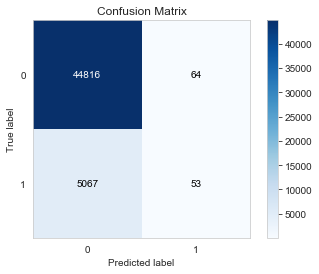

In [104]:
#Confusion matrix
from scikitplot.metrics import plot_confusion_matrix,plot_precision_recall_curve,confusion_matrix
cm=confusion_matrix(y_test,cv_predict)
#Plot the confusion matrix
plot_confusion_matrix(y_test,cv_predict,normalize=False)

In [ ]:
#using random forests
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predictionRFC = rfc.predict_proba(X_test)
predictionRFC

In [ ]:
#probability that a customer will make this transaction (target class 1)
prob = [1 - item[0] for item in predictionRFC] 
prob[:5]

In [22]:
#evaluating performance of the model
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, prob)

0.6967807428965826

In [24]:
#making prediction on test dataset

test_ID = test_df['ID_code']
test_sc = test_df.drop(['ID_code'], axis=1)
test_scaled = sc.transform(test_sc)
#test_scaled = pd.DataFrame(test_scaled, columns = test_sc.columns)
predicted = pd.DataFrame([1 - item[0] for item in rfc.predict_proba(test_scaled)])
predicted.rename(columns={0: 'target'}, inplace=True)
predicted_output = pd.concat([test_ID, predicted['target']], axis=1)
predicted_output.head()

ID_code  target
0  test_0     0.1
1  test_1     0.1
2  test_2     0.2
3  test_3     0.1
4  test_4     0.1

In [25]:
predicted_output.to_csv('PredictedRFC', index=False)